In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Задание 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

In [26]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [27]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [28]:
a = ks.mean() - b * zp.mean()
a


444.1773573243596

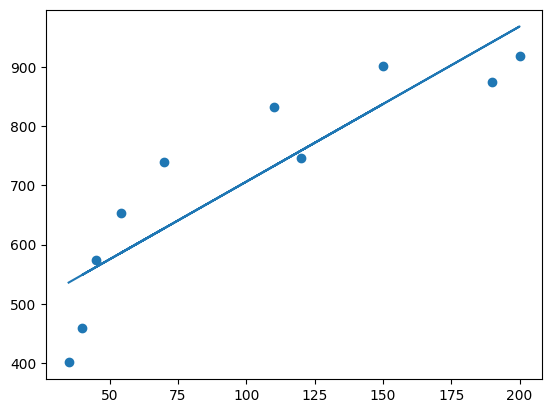

In [29]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)

In [30]:
mse = np.sum(((a + b * zp) - ks) ** 2 / 10)
mse

6470.414201176659

Произвести расчет как с использованием intercept, так и без.

Без intercept


In [31]:
zp = zp.reshape(1, len(zp))
ks = ks.reshape(1, len(ks))

In [32]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[5.88982042]])

In [33]:
mse = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse

56516.85841571942

In [34]:
def mse(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [35]:
mse(5.88982042)

56516.85841571943

С intercept


In [36]:
zp = np.vstack([np.ones((1, 10)), zp])

In [37]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[444.17735732],
       [  2.62053888]])

Задание 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [38]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [39]:
alpha = 1e-6
w1 = 0.1

In [40]:
def mse(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [41]:
for i in range(1000):
    fp = (1 / 10) * np.sum(2 * (w1 * zp - ks) * zp)
    w1 -= alpha * fp
    if i % 100 == 0:
        print(f'iteration: {i}, w1 : {w1}, mse: {mse(w1) }')

iteration: 0, w1 : 0.25952808000000005, mse: 493237.7212546963
iteration: 100, w1 : 5.54537842245223, mse: 58151.31823171113
iteration: 200, w1 : 5.868748638669329, mse: 56522.97550129376
iteration: 300, w1 : 5.888531320728348, mse: 56516.88130936019
iteration: 400, w1 : 5.8897415574471985, mse: 56516.85850140053
iteration: 500, w1 : 5.889815595583751, mse: 56516.858416040064
iteration: 600, w1 : 5.889820124983314, mse: 56516.85841572062
iteration: 700, w1 : 5.889820402076462, mse: 56516.85841571941
iteration: 800, w1 : 5.88982041902807, mse: 56516.8584157194
iteration: 900, w1 : 5.889820420065112, mse: 56516.85841571941


Задание 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [44]:
def mse(w2, w1, x3, y3, n):
  return np.sum((w2 + w1 * x3 - y3)**2)/n

In [47]:
w1 = 0.1
w2 = 100
alpha = 1e-5
n = len(zp)
for i in range ((10**7//3)):
  w1 -=alpha*2/n * np.sum((w2 + w1 *zp - ks) * zp)
  w2 -=alpha*2/n * np.sum((w2 + w1 *zp - ks))
  if i % 100 == 0:
    print(w1, w2)

1.4924808000000003 100.0091712489376
5.1523404652352705 100.20324014452434
5.151056379689354 100.3776978093933
5.149772945409165 100.55206699238143
5.1484901620644274 100.72634773836528
5.147208029324999 100.90054009219851
5.145926546860904 101.07464409871204
5.144645714342334 101.2486598027141
5.143365531439649 101.42258724899025
5.142085997823374 101.59642648230323
5.140807113164202 101.77017754739312
5.139528877132994 101.9438404889773
5.1382512894007775 102.1174153517504
5.136974349638747 102.29090218038458
5.135698057518262 102.464301019529
5.13442241271085 102.63761191381073
5.133147414888207 102.8108349078336
5.131873063722191 102.98397004617914
5.130599358884831 103.15701737340626
5.129326300048319 103.32997693405123
5.1280538868850165 103.50284877262769
5.126782119067448 103.6756329336268
5.125510996268306 103.84832946151697
5.124240518160448 104.02093840074431
5.122970684416897 104.19345979573232
5.121701494710845 104.3658936908817
5.120432948715646 104.5382401305709
5.119165

KeyboardInterrupt: 